In [286]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
import plotly.graph_objs as go
import plotly.plotly as py
import plotly 

plotly.tools.set_credentials_file(username='tdinh_234', api_key='IOcuWS7XOFeDCofvKZt8') # Set your credentials
#You could replace 'tdinh_234' and 'IOcuWS7XOFeDCofvKZt8' with your Plotly username and API key.

## Import the dataset csv

In [366]:
data = pd.read_csv('./accuracy_full.csv')
data_algo = data.drop(columns='Unnamed: 0').copy()

In [367]:
# =======================================================
# >>>>>>>>>>>>>>>>>>>>>IMPORTANT<<<<<<<<<<<<<<<<<<<<<<<<<
# =======================================================
# If you wanna visualize the dataset 'X' which you like,
# you just replace the parameter 'heart-h' into 'X'
# =======================================================

data_text = data_algo[['clf name & configuration','heart-h']]

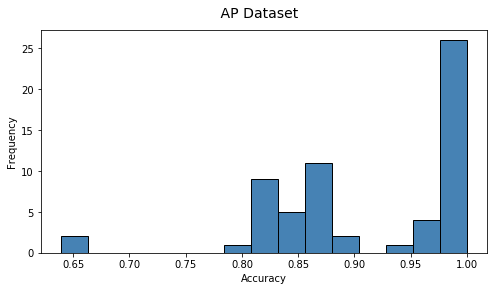

In [362]:
fig = plt.figure(figsize=(8, 4)) # Create a new figure with the 
    # size 8x4 (unit:inch)
title = fig.suptitle( ' AP Dataset', fontsize=14) # Set title
fig.subplots_adjust(top=0.9, wspace=0.3) # Set the position of title
# We'll have 2 subplot, histogram plot is on the left 
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Accuracy') # Set the name axis-x
ax.set_ylabel('Frequency') # Set the name axis-y
freq, bins, patches = ax.hist(data_text.iloc[:,1], 
        color='steelblue', bins=15, edgecolor='black', linewidth=1)

In [ ]:
# ======================================================================
# this function helps us to get values for each bins in histogram graph
# for ex: in a bin [0.75, 0.8], I wanna get the algorithms in it
# =====================================================================
def values_for_each_bins(data,bins):
    a = []
    for i in range(len(bins)-1):
        b = []
        for j in range(len(data)):
            if data.iloc[j,1] >= bins[i] and data.iloc[j,1] <= bins[i+1]:
                b.append(data.iloc[j,0])
        a.append(b)
    return a

In [369]:
values = values_for_each_bins(data_text, bins)
values

[["weka.classifiers.functions.MultilayerPerceptron-['-H', '24,24,12', '-N', '150', '-L', '0.1', '-V', '20', '-E', '10']",
  "weka.classifiers.functions.MultilayerPerceptron-['-H', '24,12,12', '-N', '150', '-L', '0.1', '-V', '20', '-E', '10']"],
 [],
 [],
 [],
 [],
 [],
 ["weka.classifiers.trees.J48-['-M', 1, '-U']"],
 ["weka.classifiers.trees.J48-['-M', 2]",
  "weka.classifiers.trees.J48-['-M', 2, '-O']",
  "weka.classifiers.trees.J48-['-M', 2, '-R']",
  "weka.classifiers.trees.J48-['-M', 1]",
  "weka.classifiers.lazy.IBk-['-K', 2]",
  "weka.classifiers.rules.OneR-['-B', 4]",
  "weka.classifiers.lazy.LWL-['-W', 'weka.classifiers.trees.J48']",
  "weka.classifiers.rules.OneR-['-B', 32]",
  "weka.classifiers.rules.OneR-['-B', 8]"],
 ["weka.classifiers.trees.J48-['-M', 3]",
  "weka.classifiers.functions.MultilayerPerceptron-['-H', '24,24,24', '-N', '150', '-L', '0.1', '-V', '20', '-E', '10']",
  "weka.classifiers.lazy.LWL-['-W', 'weka.classifiers.bayes.NaiveBayes']",
  "weka.classifiers.la

In [365]:
x = data_text.iloc[:,1]
y = data_text.iloc[:,0]
data = [go.Histogram(
    histfunc = "count",
    x = x,
    y = y,
    text = values,
    xbins = dict(
        start = bins[0],
        end=bins[-1],
        size = bins[1]-bins[0]
    ),
     marker = dict(color = 'rgba(30, 139, 195, 1)',line = dict(color = 'rgba(36, 37, 42, 1)',width = 2))
)
   ]
py.iplot(data, barmode='stack')


/home/haipro/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



## Notice:
 Because the library plotly isn't free, so it limit us to use only 25 Public Charts for each account. Run 3 codes below, it allows us ignore this limit.

In [345]:

import plotly
import plotly.plotly as py

import json
import requests
from requests.auth import HTTPBasicAuth
# ============Attention==========
username = 'tdinh_234' # Replace with YOUR USERNAME
api_key = 'IOcuWS7XOFeDCofvKZt8' # Replace with YOUR API KEY
# ===============================
auth = HTTPBasicAuth(username, api_key)
headers = {'Plotly-Client-Platform': 'python'}

plotly.tools.set_credentials_file(username=username, api_key=api_key)

def get_pages(username, page_size):
    url = 'https://api.plot.ly/v2/folders/all?user='+username+'&page_size='+str(page_size)
    response = requests.get(url, auth=auth, headers=headers)
    if response.status_code != 200:
        return
    page = json.loads(response.content)
    yield page
    while True:
        resource = page['children']['next'] 
        if not resource:
            break
        response = requests.get(resource, auth=auth, headers=headers)
        if response.status_code != 200:
            break
        page = json.loads(response.content)
        yield page
def permanently_delete_files(username, page_size=500, filetype_to_delete='plot'):
    for page in get_pages(username, page_size):
        for x in range(0, len(page['children']['results'])):
            fid = page['children']['results'][x]['fid']
            res = requests.get('https://api.plot.ly/v2/files/' + fid, auth=auth, headers=headers)
            res.raise_for_status()
            if res.status_code == 200:
                json_res = json.loads(res.content)
                if json_res['filetype'] == filetype_to_delete:
                    # move to trash
                    requests.post('https://api.plot.ly/v2/files/'+fid+'/trash', auth=auth, headers=headers)
                    # permanently delete
                    requests.delete('https://api.plot.ly/v2/files/'+fid+'/permanent_delete', auth=auth, headers=headers)
permanently_delete_files(username, filetype_to_delete='plot')
permanently_delete_files(username, filetype_to_delete='grid')